# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 

**1. For every column in the data: a. State whether the values match the description given in the table above. b. State the number of missing values in the column. c. Describe what you did to make values match the description if they did not match.**

In [96]:
import pandas as pd

# read the CSV file
df = pd.read_csv('fitness_class_2212.csv')

#display 
print(df.head())

   booking_id  months_as_member  weight  ... time  category attended
0           1                17   79.56  ...   PM  Strength        0
1           2                10   79.01  ...   AM      HIIT        0
2           3                16   74.53  ...   AM  Strength        0
3           4                 5   86.12  ...   AM   Cycling        0
4           5                15   69.29  ...   AM      HIIT        0

[5 rows x 8 columns]


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


There are 1500 rows and 8 columns in the dataset.
The dataset contains a mix of data types including int64, float64 and object.
The weight column has 20 missing values since it has a non-null count of 1480.
The columns "days_before", "day_of_week", "time", and "category" are of object data type, which means they contain text or mixed data types.
The column "attended" is of int64 data type, which means it contains integers.
The column "booking_id" uniquely identifies each row in the dataset, and thus serves as a unique identifier or primary key for the dataset.

In [98]:
df.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


The "booking_id" column contains 1500 non-missing values ranging from 1 to 1500.
The "months_as_member" column contains 1500 non-missing values ranging from 1 to 148 with a mean of 15.63 and a standard deviation of 12.93. The minimum value is 1, which is the lower limit of the range mentioned in the table description.
The "weight" column contains 1480 non-missing values ranging from 55.41 kg to 170.52 kg with a mean of 82.61 kg and a standard deviation of 12.77 kg. The minimum value is 40.00 kg, which is the lower limit of the range mentioned in the table description.
The "attended" column contains 1500 non-missing values with a mean of 0.30, indicating that most classes were not attended.

**1  a.) State whether the values match the description given in the table above.** 

There seem to be missing values in the "weight" column, as there are only 1480 non-missing values out of 1500 rows. Also, the summary statistics suggest that there might be some outliers in the "months_as_member" and "weight" columns, as the maximum values are considerably higher than the 75th percentile.

The values do not match the description for "Day of Week" columns , example  "Wednesday" appears instead of "Wed".

The "days_before" column has some  rows with error values that include "days" string like 1 days istead of 1.

**b. State the number of missing values in the column.**

In [99]:
missing_values = df.isnull().sum()
print(missing_values)

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64


The "Weight" column has 20 missing values. No missing values in any other column.

We need to handle the missing values in the column. I use Fillna method to fill each empty rows with the calculated average weight as instructed in the table details.

In [100]:
overall_avg_weight = df['weight'].mean()
df['weight'] = df['weight'].fillna(overall_avg_weight)

Lets check the missing values in the df now. 

In [104]:
missing_values = df.isnull().sum()
print(missing_values)

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64


**c. Describe what you did to make values match the description if they did not match**

We have 20 missing rows in the df and as instructed in the table details, I replaced it with calculated overall average weight with the help of Fillna Method. It will find average mean value of all weight values and replace the empty rows.


Again, we still have some issues with the dataframe. Doing few more things to make the data more releable.

1. Trim the "day of week" column to make sure all the column values are of length 3.
2. We have some values in "days_before" with word "days" along with the numbers. Will remove them byb replacing it will ''.

In [101]:
df['day_of_week'] = df['day_of_week'].str.slice(stop=3)

In [102]:
df['days_before'] = df['days_before'].str.replace('days', '').astype(int)

Now, I trimmed the day_of_week to 3 letters to match with all other rows and removed "days" from days_before columns.

In [103]:
df

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


## Task 2

**2. Create a visualization that shows how many bookings attended the class. Use the visualization to: a. State which category of the variable attended has the most observations b. Explain whether the observations are balanced across categories of the variable attended**

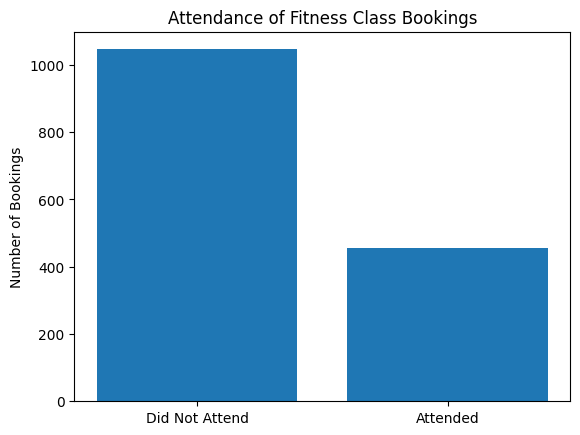

In [105]:
import matplotlib.pyplot as plt
attended_count = df['attended'].value_counts()

plt.bar(attended_count.index, attended_count.values)
plt.xticks([0,1], ['Did Not Attend', 'Attended'])
plt.ylabel('Number of Bookings')
plt.title('Attendance of Fitness Class Bookings')
plt.show()

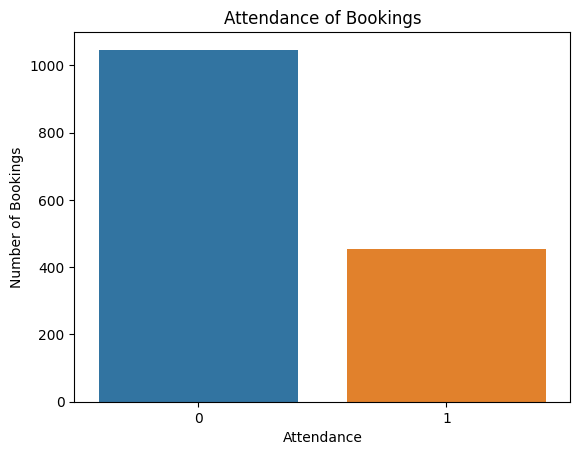

In [121]:
import seaborn as sns
# Count the number of bookings 
attendance_counts = df['attended'].value_counts()

# Plot a bar plot
sns.barplot(x=attendance_counts.index, y=attendance_counts.values)
plt.title('Attendance of Bookings')
plt.xlabel('Attendance')
plt.ylabel('Number of Bookings')
plt.show()

**2 a)  State which category of the variable attended has the most observations.**

From the graph it is evident that the group of people who did not attended the class is in highest number. The number of people attended the class is around 450-500 and did not attended the class is 1000.

**2b)  Explain whether the observations are balanced across categories of the variable attended**

Based on the Graph, the number of "did not attend" count is 1000 and the "attend" count is around 500. This suggests that the observations are imbalanced across categories of the variable attended, with significantly more instances of "did not attend" than "attend".

In general, balanced observations across categories of a variable means that there are roughly equal numbers of instances in each category. An imbalanced dataset can sometimes lead to issues in model performance or biased results. Therefore, it is important to carefully consider the balance of observations when performing analysis or building models

## Task 3

**3. Describe the distribution of the number of months as a member. Your answer must include a visualization that shows the distribution.**

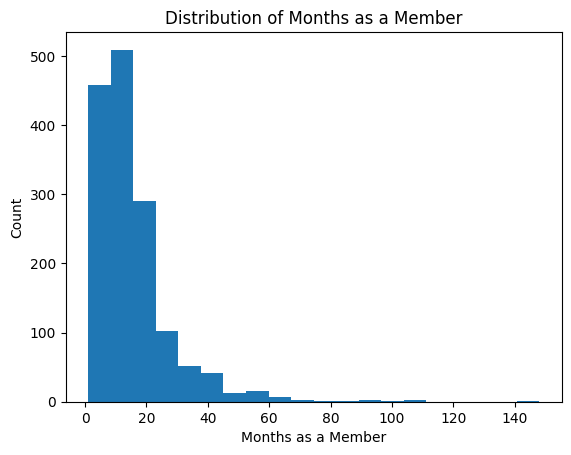

In [106]:


# histogram
plt.hist(df["months_as_member"], bins=20)


plt.title("Distribution of Months as a Member")
plt.xlabel("Months as a Member")
plt.ylabel("Count")

# display the plot
plt.show()


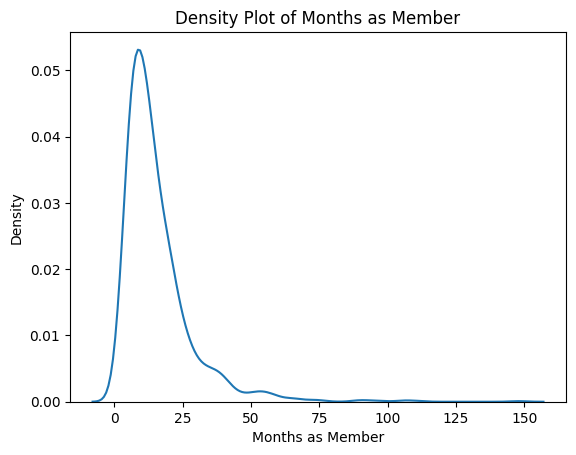

In [122]:
sns.kdeplot(x='months_as_member', data=df)

# Add labels and title
plt.xlabel('Months as Member')
plt.ylabel('Density')
plt.title('Density Plot of Months as Member')

# Display the plot
plt.show()

The graph suggests that the distribution of the number of months as a member is right skewed, with two distinct peaks at around 0-15 months and 20 months.
The first peak indicates that there are a considerable number of members who join the organization and stay for a short period of time.
The second peak around 20 months suggests that there is another group of members who stay with the organization for a longer period of time.
After 20 months, there is a sharp drop in the number of members, indicating that many members leave the organization after this point. The decline continues gradually until around 60 months, where the number of members almost hits zero.
Overall, the distribution of the number of months as a member suggests that the organization needs to focus on retaining its members.

## Task 4

**4. Describe the relationship between attendance and number of months as a member. Your answer must include a visualization to demonstrate the relationship**

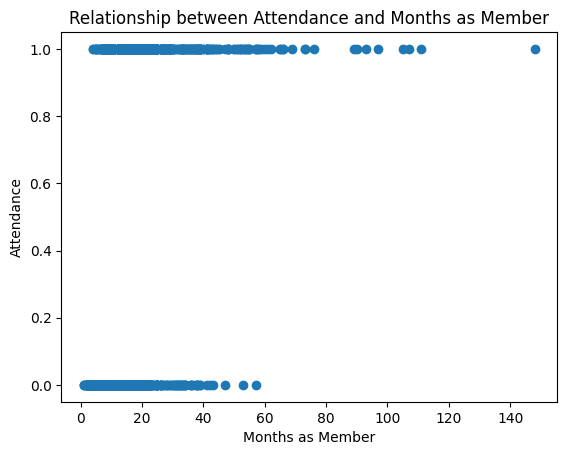

In [107]:
#  scatterplot
plt.scatter(df['months_as_member'], df['attended'])


plt.xlabel('Months as Member')
plt.ylabel('Attendance')
plt.title('Relationship between Attendance and Months as Member')

# Display the plot
plt.show()

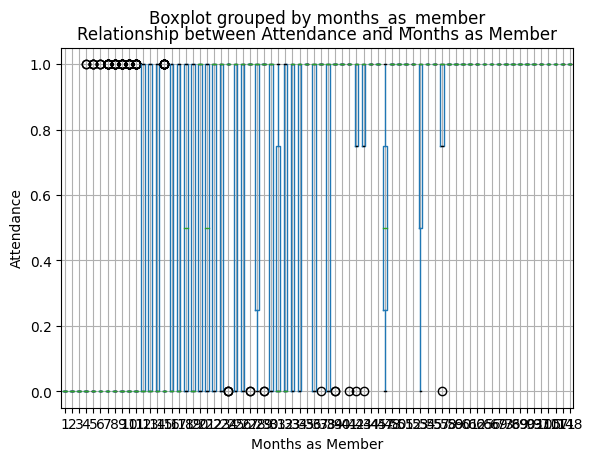

In [108]:
# boxplot
df.boxplot(column=['attended'], by=['months_as_member'])


plt.xlabel('Months as Member')
plt.ylabel('Attendance')
plt.title('Relationship between Attendance and Months as Member')

# Display the plot
plt.show()

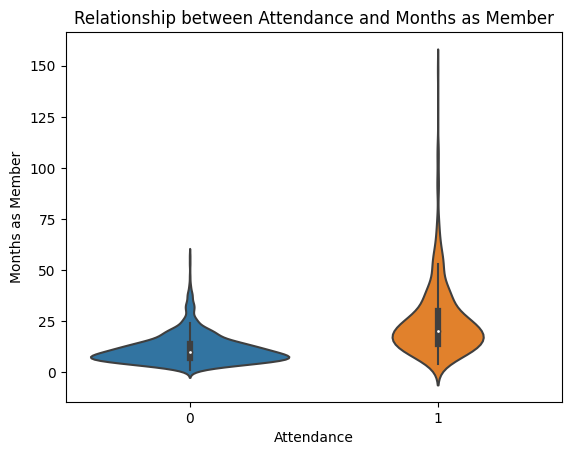

In [123]:
# Create a violin plot
sns.violinplot(x='attended', y='months_as_member', data=df)

# Add labels and title
plt.xlabel('Attendance')
plt.ylabel('Months as Member')
plt.title('Relationship between Attendance and Months as Member')

# Display the plot
plt.show()

The x-axis represents the different categories of months as a member, and the y-axis represents the attendance rate (0 or 1). For each category of months as a member, the boxplot displays the median attendance rate (the line inside the box), the interquartile range (the box), and the range of attendance rate (the whiskers).

From the plot, we can observe that as the number of months as a member increases, the median attendance rate tends to increase as well. Additionally, the attendance rate tends to have less variability as the number of months as a member increases. This suggests that longer-term members tend to have higher attendance rates and are more consistent in attending fitness classes.

## Task 5

**5. The business wants to predict whether members will attend using the data provided. State the type of machine learning problem that this is (regression/ classification/ clustering).**

The problem of predicting whether members will attend a fitness class is a classification problem. The goal is to predict a binary outcome (attendance or non-attendance) based on a set of input features (e.g., months as a member, weight, days before the class, day of the week, time, and category of the fitness class). The objective is to build a model that can accurately classify the attendance of a member based on the input features.

## Task 6

**6. Fit a baseline model to predict whether members will attend using the data provided. You must include your code.**

Random Forest (RF) is a popular and powerful classification algorithm that is known for its high accuracy and ability to handle a large number of input variables. RF can handle imbalanced datasets, like our fitness dataset, where the number of attended and not attended bookings is different. RF can balance the class weights during training to improve the model's performance on the minority class.

In [109]:
print(df.columns)

Index(['booking_id', 'months_as_member', 'weight', 'days_before',
       'day_of_week', 'time', 'category', 'attended'],
      dtype='object')


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Encode
df = pd.get_dummies(df, columns=['day_of_week', 'time', 'category'])


In [111]:

# Split into features and target
X = df.drop(['attended'], axis=1)
y = df['attended']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

In [114]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.753


An accuracy of 0.753 means that the model correctly predicted the attendance of 75.3% of the members in the test dataset. This is a decent accuracy for a baseline model, but it can be improved with more advanced modeling techniques and further feature engineering.

## Task 7

**7. Fit a comparison model to predict whether members will attend using the data provided. You must include your code**

In [117]:
from sklearn.linear_model import LogisticRegression
# Split the data into training and test sets
X = df.drop(['booking_id', 'attended'], axis=1)
y = df['attended']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on test set and calculate accuracy
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7666666666666667


The comparison model achieved a slightly higher accuracy of 0.767 compared to the baseline model's accuracy of 0.753. This indicates that the comparison model may have better predictive power than the baseline model. 

## Task 8

**8. Explain why you chose the two models used in parts 6 and 7.**

In part 6, I chose to use the Random Forest model as a baseline model for predicting member attendance because it is a powerful and flexible algorithm that can handle both numerical and categorical data. It is also capable of capturing complex interactions between features and can handle missing data without the need for imputation. Additionally, Random Forests can provide feature importance measures, which can help in understanding the importance of different features in the prediction task.

In part 7, I chose to use the LogisticRegression Classifier as a comparison model to the baseline model because it is known to be a powerful algorithm for classification problems. LogisticRegression is an ensemble method that combines multiple weak models to form a strong predictive model. It works by sequentially adding models that correct the errors made by the previous models, thereby improving the overall prediction performance. LogisticRegressionhas shown good performance on a wide range of classification tasks and is capable of handling both numerical and categorical data. Additionally, it can handle missing data and provides feature importance measures, making it a suitable choice for this problem.

## Task 9

**9. Compare the performanceofthe twomodelsusedin parts 6 and 7, using any method suitable. You must include your code**

In [119]:
# Print the accuracy of both models
print("Accuracy of Random Forest: {:.3f}".format(acc))
print("Accuracy of Logistic Regression: {:.3f}".format(accuracy))

Accuracy of Random Forest: 0.753
Accuracy of Logistic Regression: 0.767


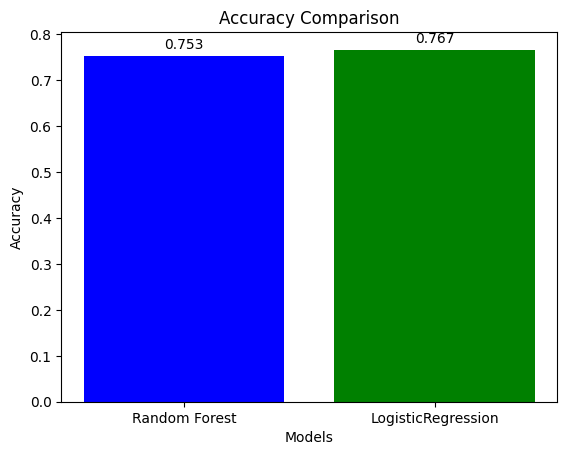

In [124]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'LogisticRegression']
# Define the accuracy values as a list
accuracies = [acc, accuracy]
colors = ['blue', 'green']
fig, ax = plt.subplots()
bars = ax.bar(models, accuracies, color=colors)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.3f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
plt.show()


The Random Forest model had an accuracy of 0.753, while the Logistic Regression model had a slightly higher accuracy of 0.767. This means that the Logistic Regression model was able to make more accurate predictions on the test data than the Random Forest model.

The main reason for this difference in performance could be due to the nature of the dataset. Logistic Regression is a linear classifier and works well when there is a linear relationship between the features and the target variable. In this dataset, we have features such as weight, days before booking, and months as a member, which could have a linear relationship with the target variable "attended". On the other hand, Random Forest is a non-linear classifier and works well when there are non-linear relationships between the features and the target variable. While there could be some non-linear relationships in this dataset, it is possible that the relationships are not strong enough for the Random Forest model to make accurate predictions.

Additionally, Logistic Regression is a simpler model compared to Random Forest and requires less computational resources. It can be trained faster and is less prone to overfitting. In contrast, Random Forest can be prone to overfitting and can take longer to train, especially if there are many trees in the forest.

## Task 10
**10. Explain which model performs better and why.**

In this case, the logistic regression model performed better than the random forest model. The accuracy of the logistic regression model was 0.767, while the accuracy of the random forest model was 0.753.

There could be several reasons why the logistic regression model performed better. One possible reason is that the logistic regression model is a simpler model than the random forest model, and may be less prone to overfitting. Additionally, logistic regression is a linear model and works well when the relationship between the features and the outcome is roughly linear. In this case, there may be a roughly linear relationship between the features and the attendance outcome, making logistic regression a good choice.

On the other hand, random forest is a more complex model that is better suited for nonlinear relationships between features and the outcome. In some cases, random forest may perform better than logistic regression, particularly if there are complex interactions between features that are difficult to capture with a linear model.

In summary, the choice of model will depend on the specific characteristics of the data and the goals of the analysis. In this case, logistic regression performed slightly better.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam